In [42]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style("darkgrid")

## Selecting a real world dataset 
#### Try to remeber this qualites while selecting the dataset:
- If you want to showcase the project, make sure the project has a huge amount of data.
- Always prefer choosing the real world dataset, for better understanding and taking decisions
- After choosing the dataset dont rush and draw graphs, give time to understand every column and it purpose.
- Most of the time we got unfiltered data so filter out the unnecery columns and rows which will not going to impact.

### 1. Reading the CSV file

In [ ]:
# If you want to use urlretrive method to download the dataset, you can use following syntax:
# from urllib.request import urlretrieve
# ds = urlretrieve(" paste the url of dataset ", "filename.csv")

In [2]:
df= pd.read_csv("GlobalLandTemperaturesByCity.csv")

### 2. The shape of the dataset:

In [3]:
shape = df.shape
shape

(8599212, 7)

### 3. Columns and the type

In [6]:
columns = df.columns
columns

unique_columns_df= list(df.columns) # ['dt','AverageTemperature','AverageTemperatureUncertainty','City','Country','Latitude','Longitude']
length_of_unique_columns_df =len(unique_columns_df) # 7
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


#### Notes:
- The temperature dataset contains 8.5 million data
- We have 7 types of data for each row, from this we will analyse 1. Date 2. Avarage Tempareture 3. City   4. Country 5. Latitude

## Perform data preparetion and data cleaning 
#### Here what we cleaned and Why?
- The Average Temperature Uncertainty, Longitude column is not going to help us anyway, so we are discarding it.
- The NaN and 0 values

##### Tasks:
- Eliminate NaN values from AverageTemperature
- Discard Column 1) AverageTemparatureUncertanity 2) Longitude
- Divide the data in mounth and year

In [8]:
df.sample(20)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1138388,1870-09-01,13.934,0.831,Brighton,United Kingdom,50.63N,1.27W
570395,1951-08-01,29.380,0.288,Baidyabati,India,23.31N,88.25E
821822,1883-10-01,21.196,0.967,Benghazi,Libya,32.95N,20.11E
5937123,1810-12-01,2.032,2.835,Podgorica,Montenegro,42.59N,19.64E
6379068,1891-01-01,7.575,0.494,Riverside,United States,34.56N,116.76W
7678887,1935-02-01,0.491,0.340,Toms River,United States,39.38N,74.91W
884407,1823-05-01,33.913,1.700,Bharatpur,India,26.52N,77.01E
4162492,1911-02-01,17.913,0.355,Lashio,Burma,23.31N,96.99E
2607657,1891-02-01,22.232,0.483,Gold Coast,Australia,28.13S,153.64E
6702511,1823-09-01,15.571,1.572,Sanmenxia,China,34.56N,110.92E


##### 1) Droping the column 1)AverageTemperatureUncertainty 

In [9]:
columns_to_drop = ['AverageTemperatureUncertainty']
df.drop(columns=columns_to_drop, inplace=True)  # In this way we can drop multiple columns in-place

In [10]:
df.sample(20)

,dt,AverageTemperature,City,Country,Latitude,Longitude
3216571,1998-04-01,27.341,Iranshahr,Iran,26.52N,60.90E
3208100,1861-08-01,15.522,Iquique,Chile,20.09S,69.95W
6776401,1942-10-01,10.723,Sarajevo,Bosnia And Herzegovina,44.20N,17.89E
7016611,1961-09-01,29.592,Sikar,India,28.13N,75.45E
212602,1882-09-01,13.551,Almere,Netherlands,52.24N,5.26E
1787101,1999-01-01,26.296,Cotabato,Philippines,7.23N,124.05E
3677070,1988-11-01,14.640,Kashipur,India,29.74N,79.38E
2688340,1932-07-01,27.765,Guantánamo,Cuba,20.09N,75.07W
3144864,1858-02-01,8.834,Ilam,Iran,32.95N,46.91E
3096821,1909-08-01,26.413,Ibaraki,Japan,34.56N,136.22E


##### 2) Droping the rows NaN values from AverageTemperature

In [11]:
df = df.dropna(subset=['AverageTemperature'])

#### 3) Checking is there any null value present

In [15]:
df.isna().sample(20)

,dt,AverageTemperature,City,Country,Latitude,Longitude
1984106,False,False,False,False,False,False
6077065,False,False,False,False,False,False
1239540,False,False,False,False,False,False
1638368,False,False,False,False,False,False
3100451,False,False,False,False,False,False
5476012,False,False,False,False,False,False
5317917,False,False,False,False,False,False
4029507,False,False,False,False,False,False
1211336,False,False,False,False,False,False
3256359,False,False,False,False,False,False


#### 4) Convering the type of Date from object to datetime and adding the mount and year column

In [16]:
df.dt = pd.to_datetime(df.dt)

##### 4.1) Adding columns

In [17]:
df["Year"] = pd.DatetimeIndex(df.dt).year
df["Month"] = pd.DatetimeIndex(df.dt).month

In [18]:
df.sample(20)

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
1993998,1928-11-01,23.186,Dhaka,Bangladesh,23.31N,90.00E,1928,11
8236645,1852-06-01,18.182,Wloclawek,Poland,52.24N,18.39E,1852,6
1328990,1999-03-01,26.361,Campeche,Mexico,20.09N,90.43W,1999,3
7337042,2008-05-01,27.642,Tacloban,Philippines,12.05N,124.93E,2008,5
3153591,1930-05-01,23.133,Ilhéus,Brazil,15.27S,39.17W,1930,5
2879920,2012-10-01,22.692,Harare,Zimbabwe,18.48S,30.42E,2012,10
5497480,1997-01-01,5.337,Ordu,Turkey,40.99N,38.34E,1997,1
5571000,1827-05-01,12.315,Oxford,United Kingdom,52.24N,0.00W,1827,5
3415596,1992-05-01,27.176,Ji Paraná,Brazil,10.45S,61.36W,1992,5
5477658,1929-02-01,7.127,Ontario,United States,34.56N,116.76W,1929,2


## Perform exploratory analysis and visualization

##### Notes:
- Highest city number: 391 (India)
- Only 7 countries with more than 100 cities (India,China,United States,Brazil,Japan,Russia,Indonesia)
- Number of country with less than 10 City: 111 (including UAE,Ghana, Soudi Arabia etc.)
> The trend says that there are many country with less City, so we have set the bar of filtering out by city to low: We Will discard those country whose city size < 3. 

#### 1) Calculating the unique country in whole dataset
- We have 159 country in this data set

In [20]:
unique_country_series = df.Country.unique()
# country_length = len(df.Country.unique()) # 159

#### 2) Calculating City per unique country

In [21]:
country_city_length_dict = {}
for country in unique_country_series:
    length_of_unique_city = len(df[df.Country == country]["City"].unique())
    country_city_length_dict[country] = length_of_unique_city
    
    
data = {"Country": list(country_city_length_dict.keys()), "City_Count": list(country_city_length_dict.values())}
countrywise_city_length_df = pd.DataFrame(data)

In [89]:
countrywise_city_length_df

,Country,City_Count
0,Denmark,4
1,Turkey,51
2,Kazakhstan,15
3,China,371
4,Spain,50
...,...,...
154,Estonia,2
155,Georgia,1
156,Mongolia,1
157,Laos,1


#### 3) Country with more than 3 city

In [93]:
threshold = 3
country_with_more_than_3_city = countrywise_city_length_df[countrywise_city_length_df.City_Count > threshold]
country_with_more_than_3_city

,Country,City_Count
0,Denmark,4
1,Turkey,51
2,Kazakhstan,15
3,China,371
4,Spain,50
...,...,...
113,Sweden,5
116,Austria,5
119,Dominican Republic,9
122,Sudan,10


#### 4) List of 20 country with city_count in descending order 

In [24]:
top_20_country_desc = countrywise_city_length_df.sort_values(by= "City_Count", ascending=False).head(20)

In [25]:
top_20_country_desc

,Country,City_Count
15,India,391
3,China,371
14,United States,248
30,Brazil,220
13,Japan,175
8,Russia,156
24,Indonesia,143
18,Mexico,97
6,Nigeria,91
5,Germany,81


#### 5) Top 5 city for more clear visualization

In [79]:
top_5_country_desc = countrywise_city_length_df.sort_values(by= "City_Count", ascending=False).head(5)

In [80]:
top_5_country_desc

,Country,City_Count
15,India,391
3,China,371
14,United States,248
30,Brazil,220
13,Japan,175


#### 6) Top 5 country with min number of cities

In [99]:
country_with_more_than_3_city.tail()

,Country,City_Count
113,Sweden,5
116,Austria,5
119,Dominican Republic,9
122,Sudan,10
123,Lithuania,5


In [102]:
top_5_country_aesc = country_with_more_than_3_city.sort_values(by= "City_Count", ascending=True).head(5)

In [103]:
top_5_country_aesc

,Country,City_Count
0,Denmark,4
59,Iraq,4
102,Guinea,4
97,Nicaragua,4
78,Norway,4


#### 4) Country with less than 10 cities

In [ ]:
country_with_less_than_10_city = (countrywise_city_length_df[countrywise_city_length_df.City_Count < 10])
country_with_less_than_10_city

##### Note : The dataset is too big so doing the average of temperature and anlysing it with other city is worthless. Like  if we average the temp. then we will lost the reason of collect the data for every mounth. So we have to peak country and corresponding city.           

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
0,1743-11-01,6.068,Århus,Denmark,57.05N,10.33E,1743,11
5,1744-04-01,5.788,Århus,Denmark,57.05N,10.33E,1744,4
6,1744-05-01,10.644,Århus,Denmark,57.05N,10.33E,1744,5
7,1744-06-01,14.051,Århus,Denmark,57.05N,10.33E,1744,6
8,1744-07-01,16.082,Århus,Denmark,57.05N,10.33E,1744,7
10,1744-09-01,12.781,Århus,Denmark,57.05N,10.33E,1744,9
11,1744-10-01,7.950,Århus,Denmark,57.05N,10.33E,1744,10
12,1744-11-01,4.639,Århus,Denmark,57.05N,10.33E,1744,11
13,1744-12-01,0.122,Århus,Denmark,57.05N,10.33E,1744,12
14,1745-01-01,-1.333,Århus,Denmark,57.05N,10.33E,1745,1


#### 5) Calculating the average temperature

In [126]:
average_yearly_temperature = df.groupby(['Country', 'Year'])['AverageTemperature'].mean()
average_yearly_temperature

Country      Year
Afghanistan  1833    13.091150
             1834    13.093600
             1835    13.959233
             1837    13.914846
             1838    14.251397
                       ...    
Zimbabwe     2009    20.106405
             2010    20.741714
             2011    20.366060
             2012    20.218274
             2013    19.404661
Name: AverageTemperature, Length: 31556, dtype: float64

In [127]:
average_yearly_temperature = average_yearly_temperature.reset_index()
average_yearly_temperature

,Country,Year,AverageTemperature
0,Afghanistan,1833,13.091150
1,Afghanistan,1834,13.093600
2,Afghanistan,1835,13.959233
3,Afghanistan,1837,13.914846
4,Afghanistan,1838,14.251397
...,...,...,...
31551,Zimbabwe,2009,20.106405
31552,Zimbabwe,2010,20.741714
31553,Zimbabwe,2011,20.366060
31554,Zimbabwe,2012,20.218274


#### We are only going to see the visualization for top 5 country with max number of cities

In [108]:
filtered_data1 = average_yearly_temperature[average_yearly_temperature['Country'].isin(top_5_country_desc['Country'])]

In [109]:
filtered_data1

,Country,Year,AverageTemperature
3774,Brazil,1824,26.478477
3775,Brazil,1825,26.489417
3776,Brazil,1826,26.397675
3777,Brazil,1827,26.743477
3778,Brazil,1828,26.119273
...,...,...,...
30367,United States,2009,14.803492
30368,United States,2010,14.883878
30369,United States,2011,15.101007
30370,United States,2012,15.959264


#### Visualization for top 5 country with min number of cities

In [110]:
filtered_data2 = average_yearly_temperature[average_yearly_temperature['Country'].isin(top_5_country_aesc['Country'])]

In [111]:
filtered_data2

,Country,Year,AverageTemperature
7723,Denmark,1743,6.221000
7724,Denmark,1744,9.147000
7725,Denmark,1745,0.060125
7726,Denmark,1750,8.808818
7727,Denmark,1751,8.188125
...,...,...,...
21182,Norway,2009,4.781042
21183,Norway,2010,2.777042
21184,Norway,2011,5.279083
21185,Norway,2012,4.165229


#### Visualization

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6));

<Figure size 1000x600 with 0 Axes>

##### 1) Average Temperature Over Years for top 5 Country with most City_Count

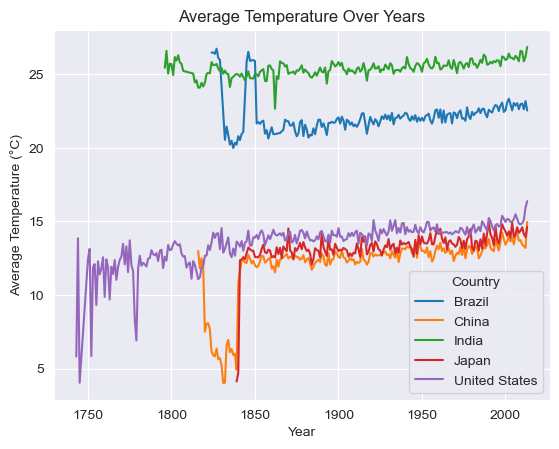

In [106]:
sns.lineplot(x='Year', y='AverageTemperature',hue='Country',data = filtered_data1 )
plt.title("Average Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()

# Adding legend
#plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))


#### 2)  Average Temperature Over Years for top 5 Country with min City_Count

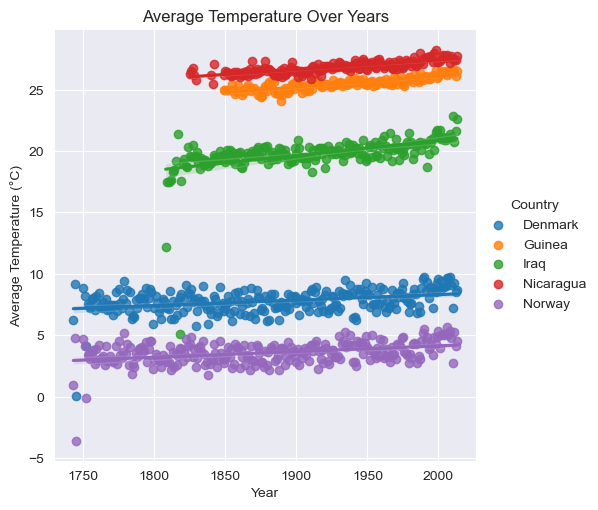

In [129]:
sns.lmplot(x='Year', y='AverageTemperature',hue='Country',data = filtered_data2 )
plt.title("Average Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()

#### 3) Max temperature in which location?

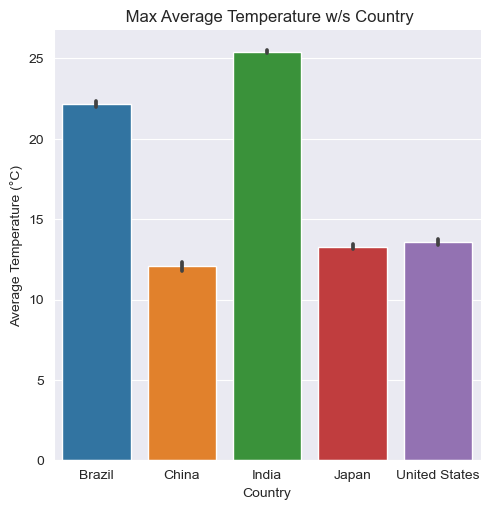

In [133]:
sns.catplot(x='Country', y='AverageTemperature',data = filtered_data1, kind="bar")
plt.title(" Max Average Temperature w/s Country")
plt.xlabel("Country")
plt.ylabel("Average Temperature (°C)")
plt.show()

## Ask question and answer those to get valuable insights
1) What is the relationship of temperature with respest to time?
2) How the temperature varries with time?
3) Max/min temperature in which location?
4) The future trend of temperature?
5) Is there any abnormality you noticed in temperature location wise? (like high lattitude but you can see the temp rise in those region)

 ### 1) What is the relationship of temperature with respest to time?

### 2) How the temperature varries with time?

### 3) Max/min temperature in which location?

### 4) The future trend of temperature?

### 5) Is there any abnormality you noticed in temperature location wise? (like high lattitude but you can see the temp rise in those region)

## Summerize your inferences and write conclusion